## Principal Component Analysis

PCA is a very widely used technique from linear algebra that helps us visualize the data along the basis such that maximum variance is captured along orthogonal dimensions. PCA makes a strong assumption: <i>linearity</i>. Linearity
vastly simplifies the problem by: <br>
(1) restricting the set of potential bases, and <br>
(2) formalizing the implicit assumption of continuity in a data set.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from pca import PCA
import tensorflow as tf
import time
import random
%matplotlib inline

## PCA implementation

PCA can be implemented in two ways:

1) Computing eigenvalues, $\lambda$ and eigenvectors, $W$ for the covariance matrix of X<br>
2) Using Singular Value Decomposition (SVD) for X to obtain U, S, V matrices

V and W are identical that give us the principal components. Using these we compute the loadings T as follows:

T = XV or T = XW

This is the data that we can further use for visualizations or feeding into classifiers for faster convergence.

### Fisher-Iris dataset

Let's use the Fisher-Iris dataset. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal dimensions, stored in a 150x4 numpy.ndarray.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

N, dim, *rest = X.shape
print (X.shape)

print (X[0:5])

(150, 4)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


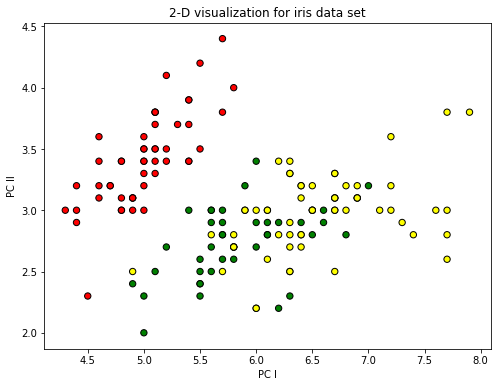

In [3]:
# Trying to visualize the first 2 features of our dataset

fig = plt.figure(1, figsize=(8,6))
colors = ['red', 'green', 'yellow']
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title("2-D visualization for iris data set")
plt.xlabel("PC I")
plt.ylabel("PC II")
plt.show()

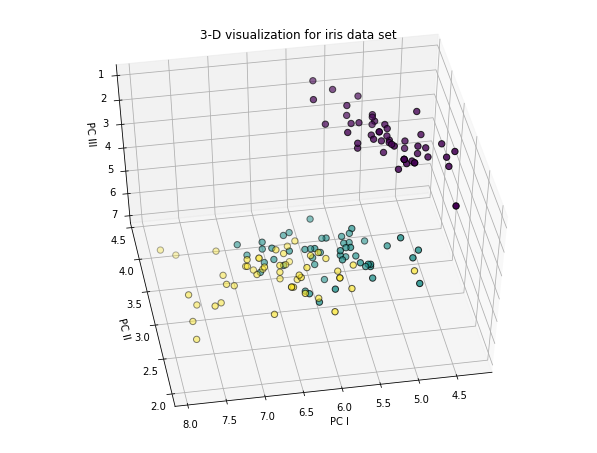

In [4]:
# Trying to visualize the first 3 features of our dataset

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-130, azim=100)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, edgecolor='k', s=40)
ax.set_xlabel("PC I")
ax.set_ylabel("PC II")
ax.set_zlabel("PC III")
ax.set_title("3-D visualization for iris data set")
plt.show()

### Method 1: Eigenvalues and eigenvectors


In [5]:
# Step 1: Normalize X
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)
print (X_std[0:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [6]:
# Step 2: Compute covariance matrix, which is of size (dim x dim)
# Here since dim=1, cov matrix is a single value

cov_mat = np.cov(X_std, rowvar=False)
print(cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
# Step 3: Compute eigenvalues and eigenvectors and arrange them in descending order
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
eigen_pairs = [(eigenvalues[idx], eigenvectors[:,idx]) for idx in range(len(eigenvalues))]
eigen_pairs.sort()
eigen_pairs.reverse()
eigenvalues_sorted = [eigen_pairs[idx][0] for idx in range(len(eigenvalues))]
eigenvectors_sorted = np.array([eigen_pairs[idx][1] for idx in range(len(eigenvalues))])

print ("Eigenvalues: %s" % eigenvalues_sorted)
print ("Eigenvectors:")
print(eigenvectors_sorted)

Eigenvalues: [2.9303537755893156, 0.9274036215173409, 0.14834222648164039, 0.020746013995596026]
Eigenvectors:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


[ 0.72770452  0.95800975  0.99484807  1.        ]


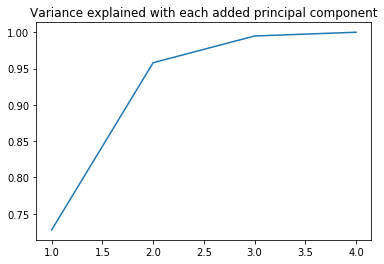

In [8]:
# Understand the variance captured by the principal components
variance_explained = np.cumsum(eigenvalues_sorted)/np.sum(eigenvalues_sorted)
print (variance_explained)

plt.plot(range(1, len(variance_explained)+1), variance_explained)
plt.title("Variance explained with each added principal component")
plt.show()

Since more than 95% of the variance is captured by the first two principal components, we can try to visualize those to understand our data. So we choose r, the number of principal components to be used for computing loadings as 2.

In [9]:
r = 2
P_reduce = eigenvectors_sorted[:,0:r]
X_proj = X.dot(P_reduce)
print(X_proj.shape)

(150, 2)


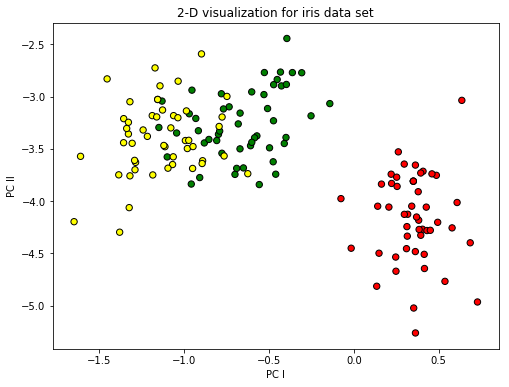

In [10]:
fig = plt.figure(1, figsize=(8,6))
colors = ['red', 'green', 'yellow']
plt.scatter(X_proj[:,0], X_proj[:,1], c=y, edgecolor='k', cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title("2-D visualization for iris data set")
plt.xlabel("PC I")
plt.ylabel("PC II")
plt.show()


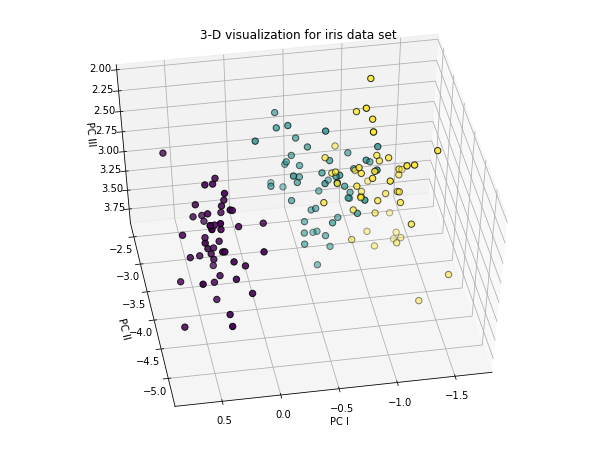

In [11]:
# Trying to capture variance from the first 3 PCs

r = 3
P_reduce = eigenvectors_sorted[:,0:r]
X_proj = X.dot(P_reduce)

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-130, azim=100)
ax.scatter(X_proj[:,0], X_proj[:,1], X_proj[:,2], c=y, edgecolor='k', s=40)
ax.set_xlabel("PC I")
ax.set_ylabel("PC II")
ax.set_zlabel("PC III")
ax.set_title("3-D visualization for iris data set")
plt.show()

Here, it's easy to see that the prinicipal components capture much more variance than the regular features and are able to help visulaize the data better.

### Method 2: Singular Value Decomposition

SVD is computationally less expensive to find out the principal components. We use the Fisher-iris dataset to understand the steps involved.

In [17]:
# Step 1. [U, s, V] = svd(X_std)
[U, s, Vt] = np.linalg.svd(X_std)
V = Vt.T
print ("Size of U: ", U.shape)
print ("Size of s: ", s.shape)
print ("Size of V: ", V.shape)

# Converting s to a matrix
S = np.zeros((dim, N))
S[:dim, :dim] = np.diag(s)
print ("Size of S: ", S.shape)
print (s)

Size of U:  (150, 150)
Size of s:  (4,)
Size of V:  (4, 4)
Size of S:  (4, 150)
[ 20.89551896  11.75513248   4.7013819    1.75816839]


Although s is not the same as $\lambda$, it gives a fair estimate of the variance being captured by the principal components. 

[ 0.53427285  0.8348372   0.95504579  1.        ]


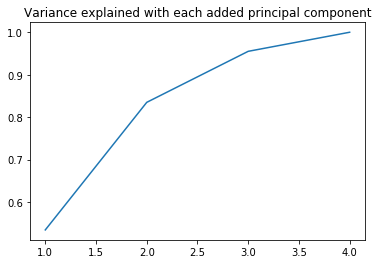

In [18]:
# Understand the variance captured by the principal components
variance_explained = np.cumsum(s)/np.sum(s)
print (variance_explained)

plt.plot(range(1, len(variance_explained)+1), variance_explained)
plt.title("Variance explained with each added principal component")
plt.show()

From the plot above, the first two principal components explain more than 85% of variance in the data while the first three explain more than 90% of data.

In [19]:
r = 2
P_reduce = V[:,0:r]
X_proj = X.dot(P_reduce)
print(X_proj.shape)

(150, 2)


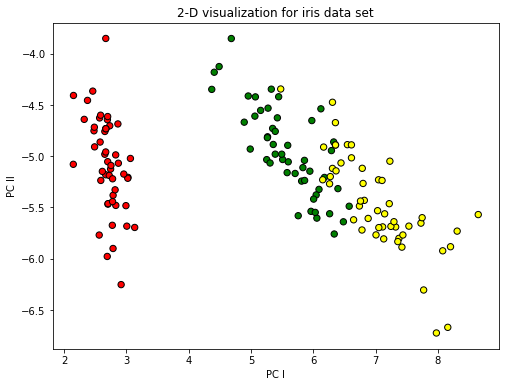

In [20]:
fig = plt.figure(1, figsize=(8,6))
colors = ['red', 'green', 'yellow']
plt.scatter(X_proj[:,0], X_proj[:,1], c=y, edgecolor='k', cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title("2-D visualization for iris data set")
plt.xlabel("PC I")
plt.ylabel("PC II")
plt.show()

X_proj shape:  (150, 3)


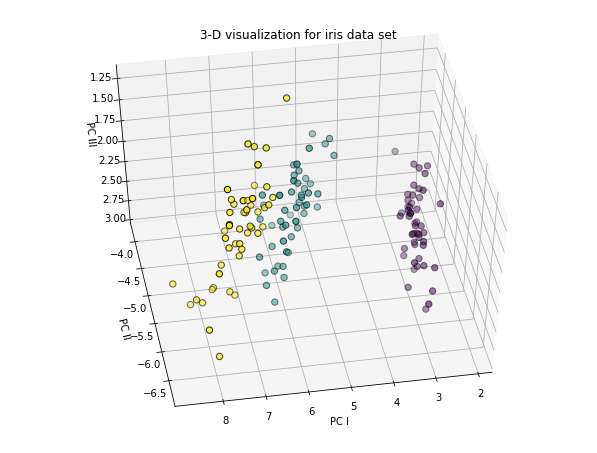

In [21]:
# Trying to capture variance from the first 3 PCs

r = 3
P_reduce = V[:,0:r]
X_proj = X.dot(P_reduce)

print ("X_proj shape: ", X_proj.shape)

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-130, azim=100)
ax.scatter(X_proj[:,0], X_proj[:,1], X_proj[:,2], c=y, edgecolor='k', s=40)
ax.set_xlabel("PC I")
ax.set_ylabel("PC II")
ax.set_zlabel("PC III")
ax.set_title("3-D visualization for iris data set")
plt.show()

Again, it's visible that the prinicipal components capture much more variance than the regular features and are able to help visulaize the data better.